In [3]:
import pandas as pd
import numpy as np

from pandas import Series, DataFrame

In [8]:
series_obj = Series(np.arange(8), index = ['row 1','row 2','row 3','row 4','row 5','row 6','row 7','row 8'])
print(series_obj)

row 1    0
row 2    1
row 3    2
row 4    3
row 5    4
row 6    5
row 7    6
row 8    7
dtype: int32


In [9]:
series_obj['row 7']

6

In [11]:
series_obj[[0,7]]

row 1    0
row 8    7
dtype: int32

### creating DataFrame object

In [24]:
np.random.seed(25)
DF_obj =DataFrame(np.random.rand(36).reshape((6,6)),
index=['row 1','row 2','row 3','row 4','row 5','row 6'], # names for rows and columns
columns = ['column 1', 'column 2','column 3','column 4','column 5','column 6',])
DF_obj        

,column 1,column 2,column 3,column 4,column 5,column 6
row 1,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
row 2,0.684969,0.437611,0.556229,0.367080,0.402366,0.113041
row 3,0.447031,0.585445,0.161985,0.520719,0.326051,0.699186
row 4,0.366395,0.836375,0.481343,0.516502,0.383048,0.997541
row 5,0.514244,0.559053,0.034450,0.719930,0.421004,0.436935
row 6,0.281701,0.900274,0.669612,0.456069,0.289804,0.525819


In [27]:
DF_obj.loc[['row 2', 'row 5'], ['column 5', 'column 2']]

,column 5,column 2
row 2,0.402366,0.437611
row 5,0.421004,0.559053


### Data slicing


In [30]:
series_obj['row 2': 'row 5']

row 2    1
row 3    2
row 4    3
row 5    4
dtype: int32

### Comparing with scalars

In [31]:
DF_obj < .2

,column 1,column 2,column 3,column 4,column 5,column 6
row 1,False,False,False,True,False,True
row 2,False,False,False,False,False,True
row 3,False,False,True,False,False,False
row 4,False,False,False,False,False,False
row 5,False,False,True,False,False,False
row 6,False,False,False,False,False,False


### Filtering with scalars

In [32]:
series_obj[series_obj>6]

row 8    7
dtype: int32

### Setting values with scalars

In [33]:
series_obj['row 1', 'row 3']= 8
series_obj

row 1    8
row 2    1
row 3    8
row 4    3
row 5    4
row 6    5
row 7    6
row 8    7
dtype: int32

## Missing values - what to do? Not a Number

In [34]:
missing = np.nan
series_obj = Series(['row 1','row 2',missing,'row 4','row 5','row 6',missing,'row 8'])
series_obj

0    row 1
1    row 2
2      NaN
3    row 4
4    row 5
5    row 6
6      NaN
7    row 8
dtype: object

series_obj.isnull()

### Filling in for missing values

In [37]:
np.random.seed(25)
DF_obj =DataFrame(np.random.rand(36).reshape((6,6)))
DF_obj

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,0.113041
2,0.447031,0.585445,0.161985,0.520719,0.326051,0.699186
3,0.366395,0.836375,0.481343,0.516502,0.383048,0.997541
4,0.514244,0.559053,0.034450,0.719930,0.421004,0.436935
5,0.281701,0.900274,0.669612,0.456069,0.289804,0.525819


In [38]:
DF_obj.loc[3:5,0] =missing
DF_obj.loc[1:4,5] = missing
DF_obj

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,NaN
2,0.447031,0.585445,0.161985,0.520719,0.326051,NaN
3,NaN,0.836375,0.481343,0.516502,0.383048,NaN
4,NaN,0.559053,0.034450,0.719930,0.421004,NaN
5,NaN,0.900274,0.669612,0.456069,0.289804,0.525819


In [39]:
filled_DF = DF_obj.fillna(0)
filled_DF

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,0.000000
2,0.447031,0.585445,0.161985,0.520719,0.326051,0.000000
3,0.000000,0.836375,0.481343,0.516502,0.383048,0.000000
4,0.000000,0.559053,0.034450,0.719930,0.421004,0.000000
5,0.000000,0.900274,0.669612,0.456069,0.289804,0.525819


In [40]:
filled_DF = DF_obj.fillna({0: 0.1, 5: 1.25})
filled_DF

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,1.250000
2,0.447031,0.585445,0.161985,0.520719,0.326051,1.250000
3,0.100000,0.836375,0.481343,0.516502,0.383048,1.250000
4,0.100000,0.559053,0.034450,0.719930,0.421004,1.250000
5,0.100000,0.900274,0.669612,0.456069,0.289804,0.525819


In [41]:
fill_DF = DF_obj.fillna(method='ffill') # puts last non nan element
fill_DF

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,0.117376
2,0.447031,0.585445,0.161985,0.520719,0.326051,0.117376
3,0.447031,0.836375,0.481343,0.516502,0.383048,0.117376
4,0.447031,0.559053,0.034450,0.719930,0.421004,0.117376
5,0.447031,0.900274,0.669612,0.456069,0.289804,0.525819


### Counting missing values

In [42]:
np.random.seed(25)
DF_obj =DataFrame(np.random.rand(36).reshape((6,6)))
DF_obj.loc[3:5,0] =missing
DF_obj.loc[1:4,5] = missing
DF_obj

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,NaN
2,0.447031,0.585445,0.161985,0.520719,0.326051,NaN
3,NaN,0.836375,0.481343,0.516502,0.383048,NaN
4,NaN,0.559053,0.034450,0.719930,0.421004,NaN
5,NaN,0.900274,0.669612,0.456069,0.289804,0.525819


In [43]:
DF_obj.isnull().sum()

0    3
1    0
2    0
3    0
4    0
5    4
dtype: int64

### Filtering missing values

In [44]:
DF_no_NaN = DF_obj.dropna() # drop row
DF_no_NaN

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.4111,0.117376


In [45]:
DF_no_NaN = DF_obj.dropna(axis = 1) # drop column
DF_no_NaN

,1,2,3,4
0,0.582277,0.278839,0.185911,0.411100
1,0.437611,0.556229,0.367080,0.402366
2,0.585445,0.161985,0.520719,0.326051
3,0.836375,0.481343,0.516502,0.383048
4,0.559053,0.034450,0.719930,0.421004
5,0.900274,0.669612,0.456069,0.289804


## Removing duplicates

In [46]:
DF_obj = DataFrame({'column 1': [1,1,2,2,3,3,3],
                   'column 2':['a', 'a', 'b','b', 'c', 'c','c'],
                   'column 3': ['A','A', 'B','B', 'C', 'C','C']})
DF_obj

,column 1,column 2,column 3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,b,B
4,3,c,C
5,3,c,C
6,3,c,C


In [47]:
DF_obj.duplicated()

0    False
1     True
2    False
3     True
4    False
5     True
6     True
dtype: bool

In [48]:
DF_obj.drop_duplicates()

,column 1,column 2,column 3
0,1,a,A
2,2,b,B
4,3,c,C


In [49]:
DF_obj = DataFrame({'column 1': [1,1,2,2,3,3,3],
                   'column 2':['a', 'a', 'b','b', 'c', 'c','c'],
                   'column 3': ['A','A', 'B','B', 'C', 'D','C']})
DF_obj

,column 1,column 2,column 3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,b,B
4,3,c,C
5,3,c,D
6,3,c,C


In [50]:
DF_obj.drop_duplicates('column 3')

,column 1,column 2,column 3
0,1,a,A
2,2,b,B
4,3,c,C
5,3,c,D


## Concatenate anf Transform Data

In [53]:
DF_obj = pd.DataFrame(np.arange(36).reshape(6,6))
DF_obj

,0,1,2,3,4,5
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


In [55]:
DF_obj_2 = pd.DataFrame(np.arange(15).reshape(5,3))
DF_obj_2

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11
4,12,13,14


### Concatenating data

In [56]:
pd.concat([DF_obj, DF_obj_2], axis=1)

,0,1,2,3,4,5,0,1,2
0,0,1,2,3,4,5,0.0,1.0,2.0
1,6,7,8,9,10,11,3.0,4.0,5.0
2,12,13,14,15,16,17,6.0,7.0,8.0
3,18,19,20,21,22,23,9.0,10.0,11.0
4,24,25,26,27,28,29,12.0,13.0,14.0
5,30,31,32,33,34,35,NaN,NaN,NaN


In [57]:
pd.concat([DF_obj, DF_obj_2])

,0,1,2,3,4,5
0,0,1,2,3.0,4.0,5.0
1,6,7,8,9.0,10.0,11.0
2,12,13,14,15.0,16.0,17.0
3,18,19,20,21.0,22.0,23.0
4,24,25,26,27.0,28.0,29.0
5,30,31,32,33.0,34.0,35.0
0,0,1,2,NaN,NaN,NaN
1,3,4,5,NaN,NaN,NaN
2,6,7,8,NaN,NaN,NaN
3,9,10,11,NaN,NaN,NaN


### Transforming Data

#### Droping Data

In [58]:
DF_obj.drop([0, 2])

,0,1,2,3,4,5
1,6,7,8,9,10,11
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


In [60]:
DF_obj.drop([0, 2], axis =1)

,1,3,4,5
0,1,3,4,5
1,7,9,10,11
2,13,15,16,17
3,19,21,22,23
4,25,27,28,29
5,31,33,34,35


#### Adding data

In [63]:
series_obj = Series(np.arange(6))
series_obj.name = 'added variable'
series_obj

0    0
1    1
2    2
3    3
4    4
5    5
Name: added variable, dtype: int32

In [65]:
variable_added = DataFrame.join(DF_obj, series_obj) # dodaje zmienną (adds column)
variable_added

,0,1,2,3,4,5,added variable
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5


In [67]:
added_datatable = variable_added.append(variable_added, ignore_index = True) # dodaje wiersze (adds rows)
added_datatable

,0,1,2,3,4,5,added variable
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5
6,0,1,2,3,4,5,0
7,6,7,8,9,10,11,1
8,12,13,14,15,16,17,2
9,18,19,20,21,22,23,3


#### Sorting data

In [68]:
DF_sorted = DF_obj.sort_values(by=(5), ascending = False)
DF_sorted

,0,1,2,3,4,5
5,30,31,32,33,34,35
4,24,25,26,27,28,29
3,18,19,20,21,22,23
2,12,13,14,15,16,17
1,6,7,8,9,10,11
0,0,1,2,3,4,5


## Grouping and Agregation

#### Grouping data by column index

In [69]:
# I had no access to data



## Object Oriented Plottingm

In [5]:
import numpy as np
from numpy.random import random
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import rcParams


In [72]:
%matplotlib inline # print matplotlib obj inline
rcParams['figure.figsize']=5,4

##### Defining axes, grids and ticks

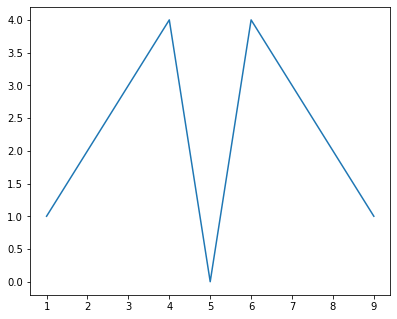

In [73]:
x = range(1,10)
y = [1,2,3,4,0,4,3,2,1]

fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])
ax.plot(x,y)

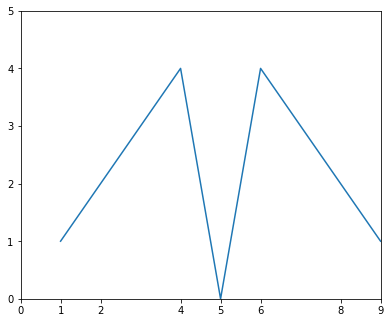

In [75]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

ax.set_xlim([1,9])
ax.set_ylim([0,5])

ax.set_xticks([0,1,2,4,5,6,8,9])
ax.set_yticks([0,1,2,3,4,5])
ax.plot(x,y)

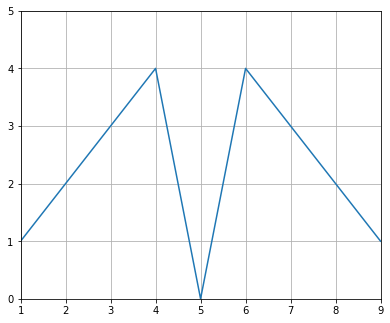

In [77]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

ax.set_xlim([1,9])
ax.set_ylim([0,5])

ax.grid()
ax.plot(x,y)

<Figure size 360x288 with 0 Axes>

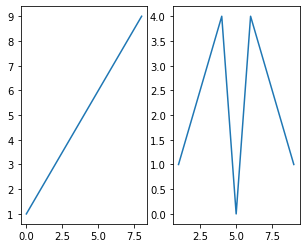

In [79]:
fig = plt.figure()
fig, (ax1, ax2)=plt.subplots(1,2) # geneerating multiple plots in one figure with subplots

ax1.plot(x)
ax2.plot(x,y)

### Creating labels and annotations

Text(0.5, 0, 'your y-axis lable')

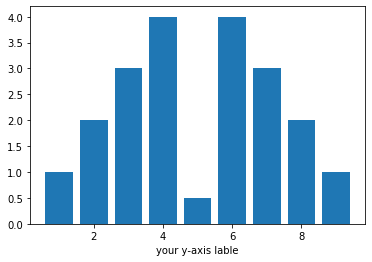

In [8]:
x= range(1,10)
y = [1,2,3,4,.5, 4,3,2,1]
plt.bar(x,y)
plt.xlabel('your x-axis lable')
plt.xlabel('your y-axis lable')

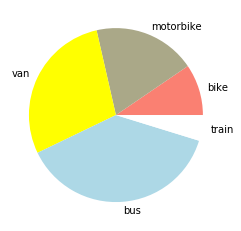

In [6]:
z = [1,2,3,4,.5]
veh_type=['bike', 'motorbike', 'van', 'bus', 'train']
color_theme = ['salmon', '#aaa888', 'yellow', 'lightblue', 'white']
plt.pie(z, labels = veh_type, colors = color_theme)
plt.show()

#### customize line style

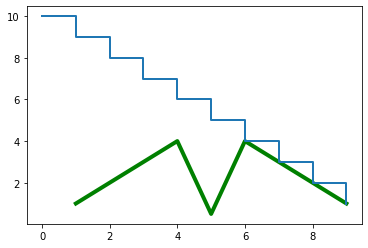

In [17]:
x1 = range(0,10)
y1 = [10,9,8,7,6,5,4,3,2,1]
plt.plot(x,y,ds = 'default', lw =4, color = 'green')
plt.plot(x1, y1, ds = 'steps-post', lw = 2)


#### setting plot markers

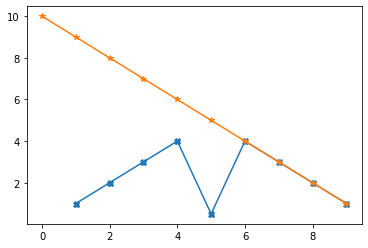

In [20]:
plt.plot(x,y, marker ='X')
plt.plot(x1, y1, marker = '*')